# Investigate missingness

In [293]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [294]:
os.chdir("/hdd_14T/data/PXD002952/20210805_osw_run")

In [295]:
osw = pd.read_csv("triqler_input.csv", sep = "\t")

In [296]:
os.chdir("/hdd_14T/data/PXD002952/20210614_dataset/diaumpire_spectral_lib_20210706/MSFragger_20210707/diann_20210811")

In [297]:
diann = pd.read_csv("triqler_input_diann_searchScore_Qvalue.csv", sep = "\t")

## Basic statistics

### OSW

In [298]:
decoy_mapper = lambda x: x.split("_")[0]
osw["decoy"] = osw.proteins.map(decoy_mapper) == "DECOY"
osw = osw[osw["decoy"] == False] #Filter away decoy peptides and protein

In [299]:
osw_peptides = osw.peptide.unique()
osw_protein = osw.proteins.unique()
osw_n_peptides = len(osw_peptides)
osw_n_proteins = len(osw_protein)

In [300]:
print(f"Number of peptides identified on all sets: {osw_n_peptides}")
print(f"Number of proteins identified in all sets: {osw_n_proteins}")

Number of peptides identified on all sets: 22144
Number of proteins identified in all sets: 3294


In [301]:
osw_peptide_array = []
osw_protein_array = []
osw_peptide_missingness_array = []
osw_protein_missingness_array = []
osw_peptide_n_missingness_array = []
osw_protein_n_missingness_array = []
osw_condition_array = []
osw_run_array = []

for run in osw.run.unique():
    osw_run = osw[osw.run == run]
    osw_condition = osw_run.condition.unique()[0]
    osw_run_peptides = osw_run.peptide.unique()
    osw_run_proteins = osw_run.proteins.unique()
    osw_n_run_peptides = len(osw_run_peptides)
    osw_n_run_proteins = len(osw_run_proteins)
    print(f"Run:{run}, Condition:{osw_condition}")
    print(f"Peptides {osw_n_run_peptides} (missingness n : {osw_n_peptides-osw_n_run_peptides}, ratio : {1 - osw_n_run_peptides / osw_n_peptides})")
    print(f"Proteins {osw_n_run_proteins} (missingness n : {osw_n_proteins-osw_n_run_proteins }, ratio : {1 - osw_n_run_proteins / osw_n_proteins})")
    print()
    osw_peptide_array.append(osw_n_run_peptides)
    osw_protein_array.append(osw_n_run_proteins)
    osw_peptide_missingness_array.append(1 - osw_n_run_peptides / osw_n_peptides)
    osw_protein_missingness_array.append(1 - osw_n_run_proteins / osw_n_proteins)
    osw_peptide_n_missingness_array.append(osw_n_peptides-osw_n_run_peptides)
    osw_protein_n_missingness_array.append(osw_n_proteins-osw_n_run_proteins)
    osw_run_array.append(run)
    osw_condition_array.append(osw_condition)

Run:003-Pedro, Condition:2
Peptides 22095 (missingness n : 49, ratio : 0.0022127890173410103)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:007-Pedro, Condition:2
Peptides 22098 (missingness n : 46, ratio : 0.0020773121387283044)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:002-Pedro, Condition:1
Peptides 22105 (missingness n : 39, ratio : 0.0017611994219652871)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:005-Pedro, Condition:2
Peptides 22102 (missingness n : 42, ratio : 0.001896676300577993)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:004-Pedro, Condition:1
Peptides 22118 (missingness n : 26, ratio : 0.001174132947976858)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:006-Pedro, Condition:1
Peptides 22111 (missingness n : 33, ratio : 0.0014902456647398754)
Proteins 3294 (missingness n : 0, ratio : 0.0)



In [325]:
osw_stat_df = pd.DataFrame([osw_protein_array, osw_peptide_array, osw_peptide_missingness_array, osw_protein_missingness_array, 
osw_protein_n_missingness_array, osw_peptide_n_missingness_array], columns = [osw_run_array, osw_condition_array], index = ["osw_protein", "osw_peptide", "osw_protein_missingness", "osw_peptide_missingness",
                                                                                                                           "osw_protein_n_missing", "osw_peptide_n_missing"])

In [326]:
osw_stat_df

,003-Pedro,007-Pedro,002-Pedro,005-Pedro,004-Pedro,006-Pedro
,2,2,1,2,1,1
osw_protein,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.00000
osw_peptide,22095.000000,22098.000000,22105.000000,22102.000000,22118.000000,22111.00000
osw_protein_missingness,0.002213,0.002077,0.001761,0.001897,0.001174,0.00149
osw_peptide_missingness,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
osw_protein_n_missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
osw_peptide_n_missing,49.000000,46.000000,39.000000,42.000000,26.000000,33.00000


## DIANN

In [304]:
decoy_mapper = lambda x: x.split("_")[0]

diann.proteins = diann.proteins.astype(str)
diann["decoy"] = diann.proteins.map(decoy_mapper) == "DECOY"
diann = diann[diann["decoy"] == False] #Filter away decoy peptides and protein

In [305]:
diann_peptides = diann.peptide.unique()
diann_protein = diann.proteins.unique()
diann_n_peptides = len(diann_peptides)
diann_n_proteins = len(diann_protein)


In [306]:
print(f"Number of peptides identified on all sets: {diann_n_peptides}")
print(f"Number of proteins identified in all sets: {diann_n_proteins}")

Number of peptides identified on all sets: 22016
Number of proteins identified in all sets: 3293


In [307]:
diann_peptide_array = []
diann_protein_array = []
diann_peptide_missingness_array = []
diann_protein_missingness_array = []
diann_peptide_n_missingness_array = []
diann_protein_n_missingness_array = []
diann_run_array = []
diann_condition_array = []

for run in diann.run.unique():
    diann_run = diann[diann.run == run]
    diann_condition = diann_run.condition.unique()[0]
    diann_run_peptides = diann_run.peptide.unique()
    diann_run_proteins = diann_run.proteins.unique()
    diann_n_run_peptides = len(diann_run_peptides)
    diann_n_run_proteins = len(diann_run_proteins)
    print(f"Run:{run}, Condition:{diann_condition}")
    print(f"Peptides {diann_n_run_peptides} (missingness n : {diann_n_peptides-diann_n_run_peptides}, ratio : {1 - diann_n_run_peptides / diann_n_peptides})")
    print(f"Proteins {diann_n_run_proteins} (missingness n : {diann_n_proteins-diann_n_run_proteins}, ratio : {1 - diann_n_run_proteins / diann_n_proteins})")
    print()
    diann_peptide_array.append(diann_n_run_peptides)
    diann_protein_array.append(diann_n_run_proteins)
    diann_peptide_missingness_array.append(1 - diann_n_run_peptides / diann_n_peptides)
    diann_protein_missingness_array.append(1 - diann_n_run_proteins / diann_n_proteins)
    diann_peptide_n_missingness_array.append(diann_n_peptides-diann_n_run_peptides)
    diann_protein_n_missingness_array.append(diann_n_proteins-diann_n_run_proteins)
    diann_run_array.append(run)
    diann_condition_array.append(diann_condition)

Run:002-Pedro, Condition:1
Peptides 21524 (missingness n : 492, ratio : 0.02234738372093026)
Proteins 3275 (missingness n : 18, ratio : 0.005466140297600952)

Run:003-Pedro, Condition:2
Peptides 21525 (missingness n : 491, ratio : 0.02230196220930236)
Proteins 3268 (missingness n : 25, ratio : 0.007591861524445798)

Run:004-Pedro, Condition:1
Peptides 21291 (missingness n : 725, ratio : 0.03293059593023251)
Proteins 3264 (missingness n : 29, ratio : 0.00880655936835717)

Run:005-Pedro, Condition:2
Peptides 21582 (missingness n : 434, ratio : 0.019712936046511587)
Proteins 3272 (missingness n : 21, ratio : 0.006377163680534426)

Run:006-Pedro, Condition:1
Peptides 21537 (missingness n : 479, ratio : 0.02175690406976749)
Proteins 3274 (missingness n : 19, ratio : 0.005769814758578851)

Run:007-Pedro, Condition:2
Peptides 21560 (missingness n : 456, ratio : 0.020712209302325535)
Proteins 3270 (missingness n : 23, ratio : 0.006984512602490112)



In [327]:
diann_stat_df = pd.DataFrame([diann_protein_array, diann_peptide_array, diann_protein_missingness_array, diann_peptide_missingness_array,
                             diann_protein_n_missingness_array, diann_peptide_n_missingness_array], columns = [diann_run_array, diann_condition_array], index = ["diann_protein", "diann_peptide", "diann_protein_missingness", "diann_peptide_missingness",
                             "diann_protein_n_missing", "diann_peptide_n_missing"])

In [328]:
diann_stat_df

,002-Pedro,003-Pedro,004-Pedro,005-Pedro,006-Pedro,007-Pedro
,1,2,1,2,1,2
diann_protein,3275.000000,3268.000000,3264.000000,3272.000000,3274.000000,3270.000000
diann_peptide,21524.000000,21525.000000,21291.000000,21582.000000,21537.000000,21560.000000
diann_protein_missingness,0.005466,0.007592,0.008807,0.006377,0.005770,0.006985
diann_peptide_missingness,0.022347,0.022302,0.032931,0.019713,0.021757,0.020712
diann_protein_n_missing,18.000000,25.000000,29.000000,21.000000,19.000000,23.000000
diann_peptide_n_missing,492.000000,491.000000,725.000000,434.000000,479.000000,456.000000


## All peptides and proteins

In [310]:
print(f"OSW proteins: {osw_n_proteins}")
print(f"DIANN proteins: {diann_n_proteins}")
print(f"Number of intersecting proteins OSW - DIANN: {len(np.intersect1d(diann_protein, osw_protein))}")

OSW proteins: 3294
DIANN proteins: 3293
Number of intersecting proteins OSW - DIANN: 3289


In [311]:
print(f"OSW peptides: {osw_n_peptides}")
print(f"DIANN peptides: {diann_n_peptides}")
print(f"Number of intersecting peptides OSW - DIANN: {len(np.intersect1d(diann_peptides, osw_peptides))}")

OSW peptides: 22144
DIANN peptides: 22016
Number of intersecting peptides OSW - DIANN: 17388


In [330]:
stat_df = pd.concat([osw_stat_df, diann_stat_df])

In [331]:
stat_df.T[["osw_protein", "diann_protein"]]

,,osw_protein,diann_protein
002-Pedro,1,3294.0,3275.0
003-Pedro,2,3294.0,3268.0
004-Pedro,1,3294.0,3264.0
005-Pedro,2,3294.0,3272.0
006-Pedro,1,3294.0,3274.0
007-Pedro,2,3294.0,3270.0


In [332]:
stat_df

,002-Pedro,003-Pedro,004-Pedro,005-Pedro,006-Pedro,007-Pedro
,1,2,1,2,1,2
osw_protein,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
osw_peptide,22105.000000,22095.000000,22118.000000,22102.000000,22111.000000,22098.000000
osw_protein_missingness,0.001761,0.002213,0.001174,0.001897,0.001490,0.002077
osw_peptide_missingness,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
osw_protein_n_missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
osw_peptide_n_missing,39.000000,49.000000,26.000000,42.000000,33.000000,46.000000
diann_protein,3275.000000,3268.000000,3264.000000,3272.000000,3274.000000,3270.000000
diann_peptide,21524.000000,21525.000000,21291.000000,21582.000000,21537.000000,21560.000000
diann_protein_missingness,0.005466,0.007592,0.008807,0.006377,0.005770,0.006985


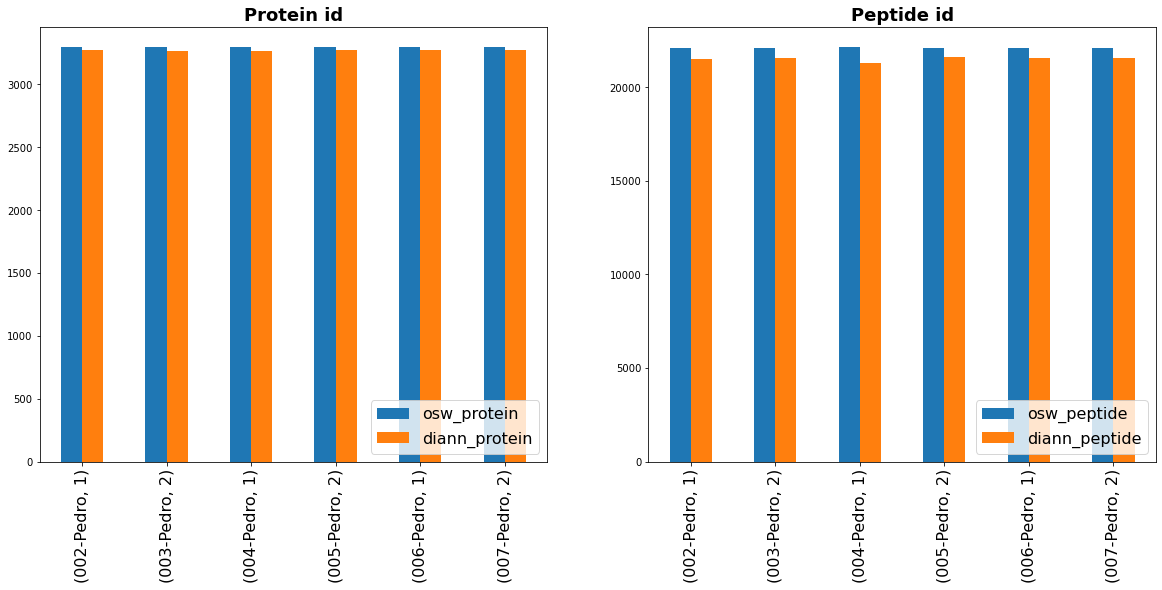

In [315]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

stat_df.T[["osw_protein", "diann_protein"]].plot.bar(ax = axs[0])
axs[0].legend(loc="lower right", fontsize = 16)
axs[0].set_title("Protein id", fontsize=18, fontweight='bold')
axs[0].tick_params(axis="x", labelsize=16) 
stat_df.T[["osw_peptide", "diann_peptide"]].plot.bar(ax = axs[1])
axs[1].legend(loc="lower right", fontsize = 16)
axs[1].set_title("Peptide id", fontsize=18, fontweight='bold')
axs[1].tick_params(axis="x", labelsize=16) 
#plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold", 
#         horizontalalignment="left")

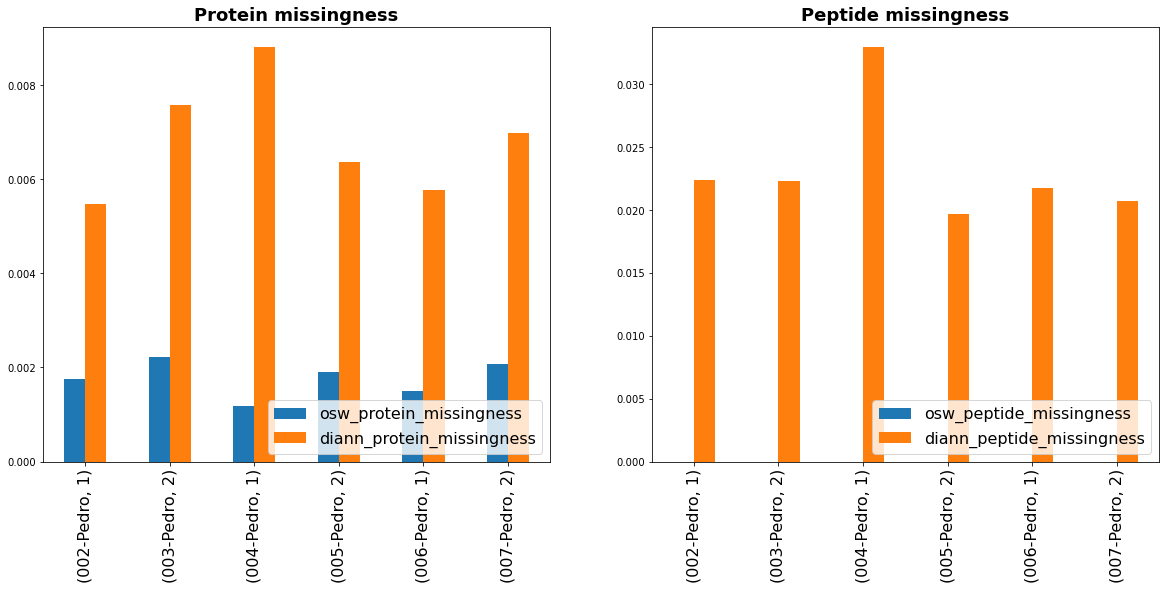

In [316]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
stat_df.T[["osw_protein_missingness", "diann_protein_missingness"]].plot.bar(ax = axs[0])
axs[0].legend(loc="lower right", fontsize = 16)
axs[0].tick_params(axis="x", labelsize=16) 
axs[0].set_title("Protein missingness", fontsize=18, fontweight='bold')
stat_df.T[["osw_peptide_missingness", "diann_peptide_missingness"]].plot.bar(ax = axs[1])
axs[1].legend(loc="lower right")
axs[1].legend(loc="lower right", fontsize = 16)
axs[1].set_title("Peptide missingness", fontsize=18, fontweight='bold')
axs[1].tick_params(axis="x", labelsize=16) 


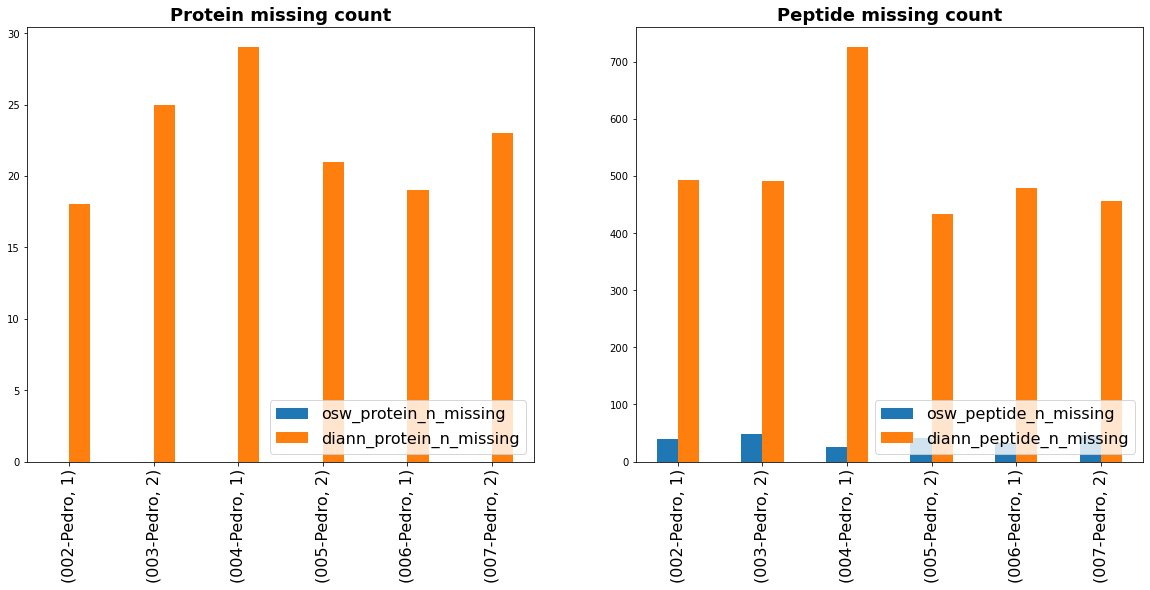

In [334]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

stat_df.T[["osw_protein_n_missing", "diann_protein_n_missing"]].plot.bar(ax = axs[0])
axs[0].legend(loc="lower right", fontsize = 16)
axs[0].set_title("Protein missing count", fontsize=18, fontweight='bold')
axs[0].tick_params(axis="x", labelsize=16) 
stat_df.T[["osw_peptide_n_missing", "diann_peptide_n_missing"]].plot.bar(ax = axs[1])
axs[1].legend(loc="lower right", fontsize = 16)
axs[1].set_title("Peptide missing count", fontsize=18, fontweight='bold')
axs[1].tick_params(axis="x", labelsize=16) 
#plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold", 
#         horizontalalignment="left")

In [317]:
stat_df.T["osw_peptide"]*stat_df.T["osw_peptide_missingness"]

002-Pedro  1    0.0
003-Pedro  2    0.0
004-Pedro  1    0.0
005-Pedro  2    0.0
006-Pedro  1    0.0
007-Pedro  2    0.0
dtype: float64

In [318]:
stat_df.T["osw_protein"]*stat_df.T["osw_protein_missingness"]

002-Pedro  1    5.801391
003-Pedro  2    7.288927
004-Pedro  1    3.867594
005-Pedro  2    6.247652
006-Pedro  1    4.908869
007-Pedro  2    6.842666
dtype: float64

In [319]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [320]:
#diann_n_peptides = len(diann_peptides)
#diann_n_proteins = len(diann_protein)
#osw_n_peptides = len(osw_peptides)
#osw_n_proteins = len(osw_protein)
protein_intersect = len(np.intersect1d(diann_protein, osw_protein))
peptide_intersect = len(np.intersect1d(diann_peptides, osw_peptides))

In [321]:
osw_diff_protein = osw_n_proteins - protein_intersect
osw_diff_peptide = osw_n_peptides - peptide_intersect
diann_diff_protein = diann_n_proteins - protein_intersect
diann_diff_peptide = diann_n_peptides - peptide_intersect

Text(0.5, 1.0, 'Peptide identification intersection')

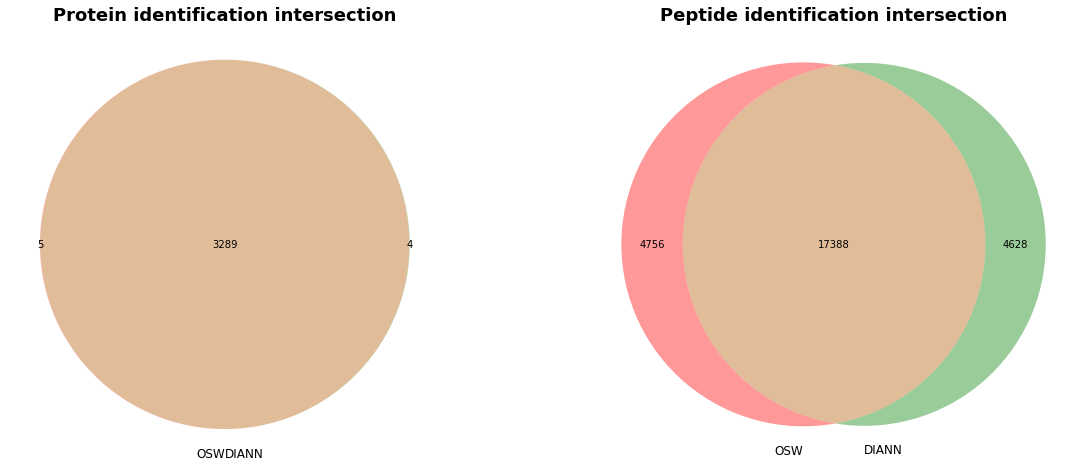

In [322]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

venn2(subsets = (osw_diff_protein, diann_diff_protein, protein_intersect), set_labels = ('OSW', 'DIANN'), ax = axs[0])
axs[0].set_title("Protein identification intersection", fontsize=18, fontweight='bold')
venn2(subsets = (osw_diff_peptide, diann_diff_peptide, peptide_intersect), set_labels = ('OSW', 'DIANN'), ax = axs[1])
axs[1].set_title("Peptide identification intersection", fontsize=18, fontweight='bold')

In [323]:
from venn import venn


Text(0.5, 1.0, 'Peptide identification intersection')

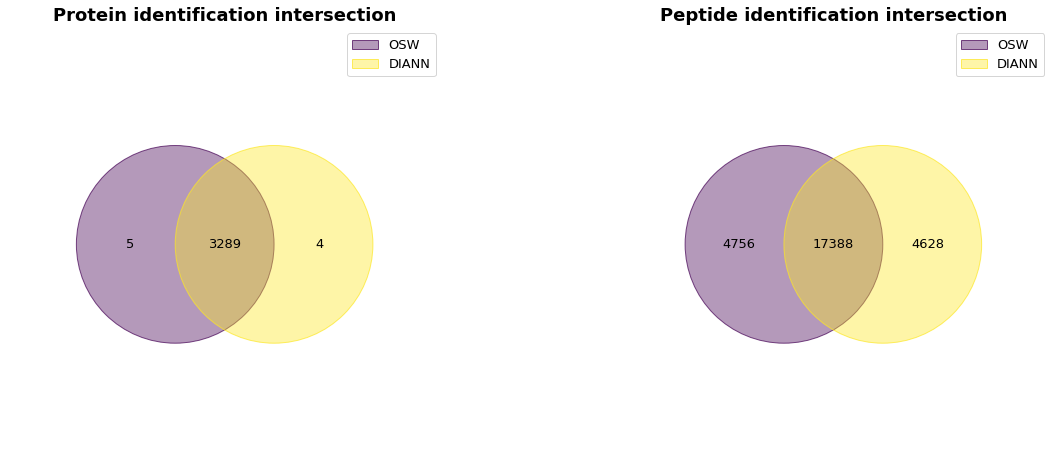

In [324]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

protein_ids = {
    "OSW": set(osw_protein),
    "DIANN": set(diann_protein)
}
venn(protein_ids, ax = axs[0])
axs[0].set_title("Protein identification intersection", fontsize=18, fontweight='bold')

peptide_ids = {
    "OSW": set(osw_peptides),
    "DIANN": set(diann_peptides)
}
venn(peptide_ids, ax = axs[1])
axs[1].set_title("Peptide identification intersection", fontsize=18, fontweight='bold')


### variance check

In [338]:
os.chdir("/hdd_14T/data/PXD002952/20210805_osw_run")
osw_v = pd.read_csv("feature_alignment.tsv", sep = "\t")

In [340]:
osw_v.m_score.max()

0.175699

In [357]:
1/np.e**(osw.searchScore.max()) # we perhaps need to check this....


0.0012244405853972604

In [358]:
osw_v["m_score", ]

,transition_group_id,peptide_group_label,run_id,filename,RT,id,Sequence,MC,FullPeptideName,Charge,...,aggr_Peak_Apex,aggr_Fragment_Annotation,rt_fwhm,masserror_ppm,d_score,m_score,peak_group_rank,align_runid,align_origfilename,align_clusterid
0,10031_run0,10031,0_0,HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedr...,671.496657,f_16649629939875847052,NHDEIVNDPKK,1,NHDEIVNDPKK,3,...,2.165598623454571;0.056513473391533;0.06503372...,12801;12804;12805;12810;12811;12816;12817;1282...,21.297999999959984;35.49699999995994;7.0999999...,NaN,-3.326951,0.175699,7,0_0,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
1,10091_run0,10091,0_0,HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedr...,4808.693115,f_6941085013889938773,NIAAQTLGDLVR,0,NIAAQTLGDLVR,3,...,0.019098043441772;1.280209183692932;0.53755897...,7938;7939;7940;7941;7942;7943;7944;7945;7946,21.298999999979969;21.298999999979969;21.29899...,NaN,1.288134,0.022839,2,0_0,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
2,10154_run0,10154,0_0,HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedr...,1253.619417,f_2763067293776968660,NIGSAPNAK,0,NIGSAPNAK,2,...,25.39574921131134;28.751327991485596;5.5372948...,12360;12362;12364;12367;12371;12373;12375;1237...,24.847999999979948;14.200000000020054;28.39799...,NaN,-0.522014,0.128019,5,0_0,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
3,10289_run0,10289,0_0,HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedr...,1516.560710,f_13730058657477034203,NKYEDEINKR,2,NKYEDEINKR,3,...,61.47161865234375;2.045345067977905;6.51276767...,12798;12799;12800;12802;12803;12806;12807;1280...,7.0999999999799;10.649000000040132;17.74900000...,NaN,3.145504,0.000390,1,0_0,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
4,10295_run0,10295,0_0,HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedr...,2630.482248,f_17600193937980806644,NLADCLR,0,NLADC(UniMod:4)LR,2,...,72.60203742980957;10.013341188430786;45.049419...,10351;10362;10363;10369;10370;10375,17.748999999959779;21.299000000039996;21.29899...,NaN,3.730789,0.000077,1,0_0,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326142,9156_run0,9156,0_5,HYE124_TTOF6600_32fix_lgillet_I150211_007-Pedr...,5135.217183,f_16157525836620749230,MLNKPVEELNIITCHLGNGGSVSAIR,0,MLNKPVEELNIITC(UniMod:4)HLGNGGSVSAIR,3,...,2.962955236434937;1.486579835414887;1.12687450...,475279;475280;475281;475282;475283;475284;4752...,28.399000000019441;31.94800000001942;31.948000...,NaN,3.175521,0.000254,1,0_5,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
326143,9211_run0,9211,0_5,HYE124_TTOF6600_32fix_lgillet_I150211_007-Pedr...,6255.217290,f_5850436144203140831,MMSALNLPLSGIQSTLGR,0,MMSALNLPLSGIQSTLGR,2,...,1.470306068658829;1.383273363113403;2.18017446...,477352;477353;477354;477355;477356;477357;4773...,10.648999999979424;35.497999999980493;35.49799...,NaN,3.441285,0.000115,1,0_5,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
326144,9329_run0,9329,0_5,HYE124_TTOF6600_32fix_lgillet_I150211_007-Pedr...,3879.946196,f_2368581440440160955,MQEVVANLQYDDGSGMK,0,MQEVVANLQYDDGSGMK,2,...,1.879959881305695;3.593338251113892;0.29434621...,476091;476092;476093;476094;476095;476096;4760...,24.84900000000016;21.298999999979969;24.849000...,NaN,2.072733,0.004266,1,0_5,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1
326145,9559_run0,9559,0_5,HYE124_TTOF6600_32fix_lgillet_I150211_007-Pedr...,5210.544461,f_10853604278961701751,AKCELSSSVQTDINLPYLTMDSSGPK,1,AKC(UniMod:4)ELSSSVQTDINLPYLTMDSSGPK,3,...,4.383002758026123;7.755447745323181;2.85168957...,479332;479333;479334;479335;479336;479337;4793...,39.048000000000684;28.398000000000138;39.04800...,NaN,1.950168,0.005586,1,0_5,osw_output.HYE124_TTOF6600_32fix_lgillet_I1502...,1


In [359]:
osw_v.columns

Index(['transition_group_id', 'peptide_group_label', 'run_id', 'filename',
       'RT', 'id', 'Sequence', 'MC', 'FullPeptideName', 'Charge', 'm/z',
       'Intensity', 'ProteinName', 'GeneName', 'decoy', 'assay_rt', 'delta_rt',
       'leftWidth', 'main_var_xx_swath_prelim_score', 'norm_RT', 'nr_peaks',
       'peak_apices_sum', 'potentialOutlier', 'initialPeakQuality',
       'rightWidth', 'rt_score', 'sn_ratio', 'total_xic', 'var_bseries_score',
       'dotprod_score', 'var_intensity_score', 'var_isotope_correlation_score',
       'var_isotope_overlap_score', 'var_library_corr', 'library_dotprod',
       'library_manhattan', 'library_rmsd', 'library_rootmeansquare',
       'library_sangle', 'var_log_sn_score', 'manhatt_score',
       'var_massdev_score', 'var_massdev_score_weighted', 'var_norm_rt_score',
       'var_xcorr_coelution', 'var_xcorr_coelution_weighted', 'xcorr_shape',
       'var_xcorr_shape_weighted', 'im_xcorr_shape', 'im_xcorr_coelution',
       'im_delta_score', 'im_m

In [389]:
osw_v["log_intensity"] = np.log(osw_v["Intensity"])

In [418]:
osw_mu = osw_v[["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.mean()
osw_std = osw_v[["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.std()
osw_mu.name = "mu"
osw_std.name = "std"
osw_mu_std = pd.concat([osw_mu, osw_std], axis = 1)
osw_mu_std["cv"] = osw_mu_std["std"]/osw_mu_std["mu"]

In [419]:
osw_mu_std

,mu,std,cv
FullPeptideName,,,
(UniMod:1)AAAAAAAAAAGAAGGR,8.207616,0.150881,0.018383
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,6.443391,0.126195,0.019585
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,7.328931,0.093058,0.012697
(UniMod:1)AAAAAATAAAAASIR,4.944538,0.638553,0.129143
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,6.491242,0.192665,0.029681
...,...,...,...
YYTVSTEVEQGK,6.307550,1.623386,0.257372
YYVHAPTQNEFLFK,2.411390,1.061248,0.440098
YYYIPQYK,6.143772,0.217266,0.035364


In [384]:
import seaborn as sns

In [441]:
osw_v_filtered = osw_v[osw_v.m_score < 0.001]
osw_v_filtered = osw_v_filtered[osw_v_filtered.log_intensity > 0]

In [442]:
osw_mu_filtered  = osw_v_filtered [["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.mean()
osw_std_filtered  = osw_v_filtered [["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.std()
osw_mu_filtered .name = "mu"
osw_std_filtered .name = "std"
osw_mu_std_filtered  = pd.concat([osw_mu_filtered , osw_std_filtered ], axis = 1)
osw_mu_std_filtered["cv"] = osw_mu_std_filtered["std"]/osw_mu_std_filtered["mu"]


Text(0.5, 0.98, 'mu/cv OSW')

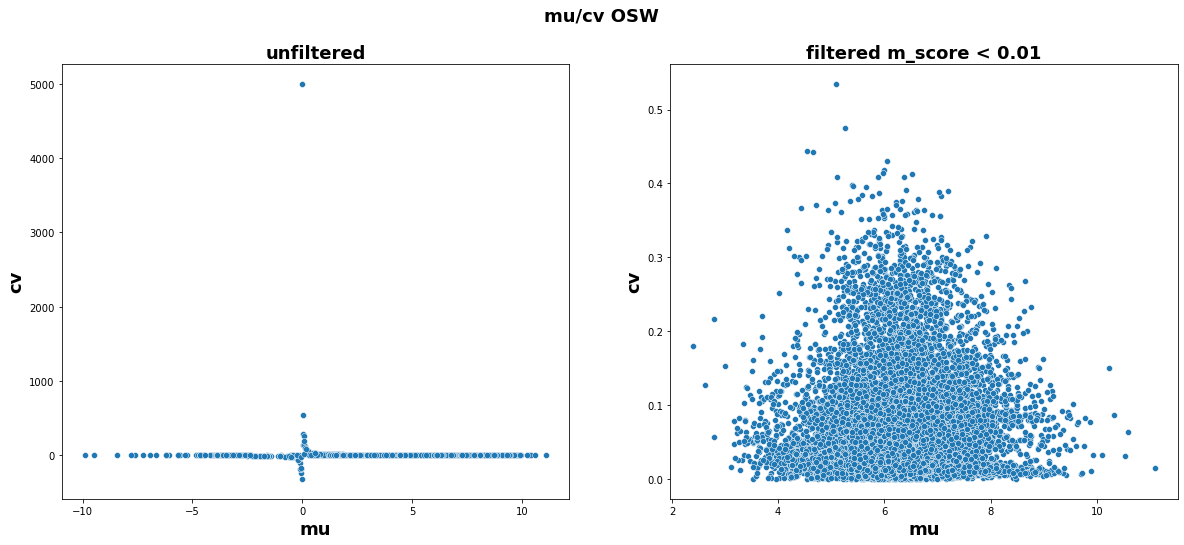

In [452]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.scatterplot(data = osw_mu_std, x = "mu", y = "cv", ax = axs[0])
#axs[0].legend(loc="lower right", fontsize = 16)
#axs[0].tick_params(axis="x", labelsize=16) 
axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')
sns.scatterplot(data = osw_mu_std_filtered, x = "mu", y = "cv", ax = axs[1])
axs[1].set_title("filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs[1].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv OSW", fontsize = 18, fontweight = "bold")

In [440]:
bins = [i*2 for i in range(11)]
mu_sig_sample1["binned_mu"] = pd.cut(mu_sig_sample1["mu"], bins)
mu_sig_sample1["quantile_bin_mu"] = pd.qcut(mu_sig_sample1["mu"], q=8)

mu_sig_sample2["binned_mu"] = pd.cut(mu_sig_sample2["mu"], bins)
mu_sig_sample2["quantile_bin_mu"] = pd.qcut(mu_sig_sample2["mu"], q=8)

-40.2025364586284

In [481]:
#bins = [i*2 for i in range(11)]
bins = [i for i in range(14)]

osw_mu_std["binned_mu"] = pd.cut(osw_mu_std["mu"], bins)
osw_mu_std["quantile_bin_mu"] = pd.qcut(osw_mu_std["mu"], q = 10)

osw_mu_std_filtered["binned_mu"] = pd.cut(osw_mu_std_filtered["mu"], bins)
osw_mu_std_filtered["quantile_bin_mu"] = pd.qcut(osw_mu_std_filtered["mu"], q = 10)

Text(0.5, 0.98, 'mu/cv violin binned (equal bin) OSW')

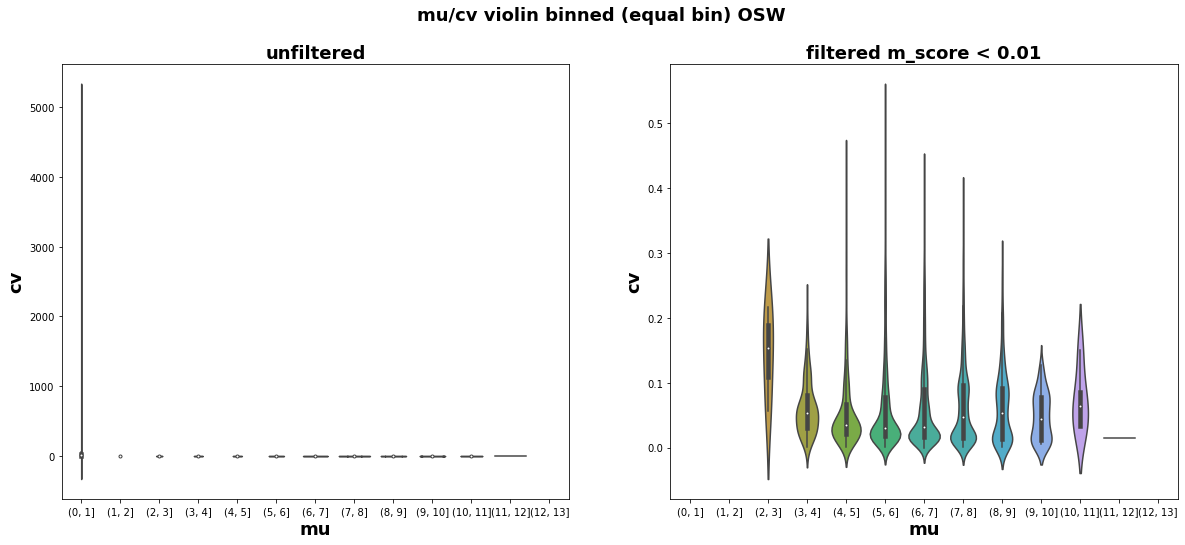

In [482]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

sns.violinplot(x='binned_mu', y='cv', data=osw_mu_std, ax = axs[0])
axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')

sns.violinplot(x='binned_mu', y='cv', data=osw_mu_std_filtered, ax = axs[1])
axs[1].set_title("filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs[1].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv violin binned (equal bin) OSW", fontsize = 18, fontweight = "bold")

Text(0.5, 0.98, 'mu/cv violin binned (quantile bin) OSW')

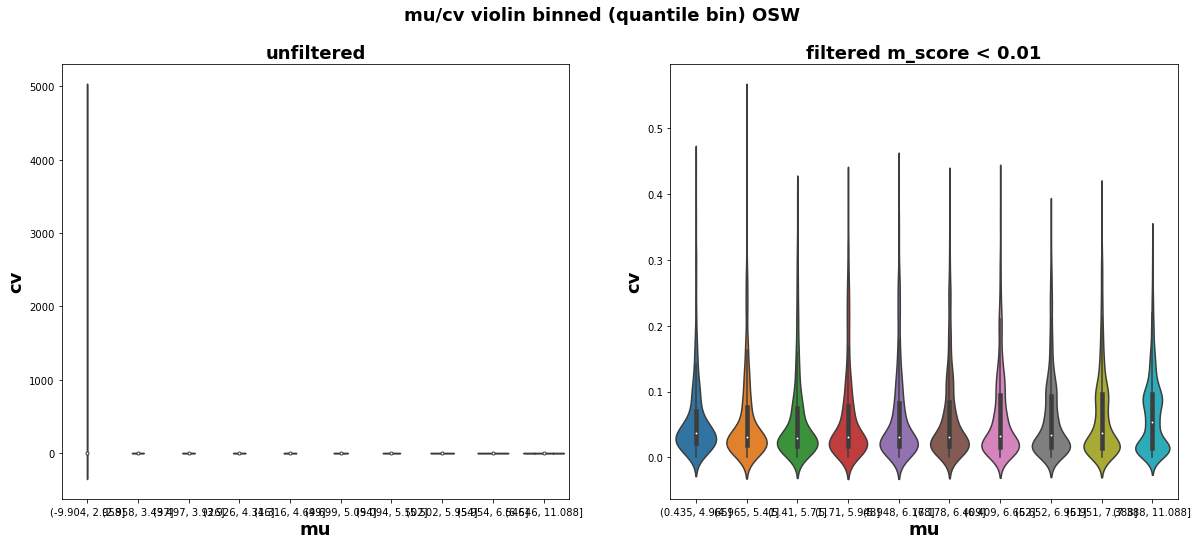

In [485]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.violinplot(x='quantile_bin_mu', y='cv', data=osw_mu_std, ax = axs[0])
axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')

sns.violinplot(x='quantile_bin_mu', y='cv', data=osw_mu_std_filtered, ax = axs[1])
axs[1].set_title("filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs[1].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv violin binned (quantile bin) OSW", fontsize = 18, fontweight = "bold")

# Filtered jointplots

In [522]:
osw_mu_std_filtered

,mu,std,cv,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,8.207616,0.150881,0.018383,"(8, 9]","(7.388, 11.088]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,6.442127,NaN,NaN,"(6, 7]","(6.409, 6.652]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,7.429615,0.037133,0.004998,"(7, 8]","(7.388, 11.088]"
(UniMod:1)AAAAAGTATSQR,6.830233,0.104065,0.015236,"(6, 7]","(6.652, 6.951]"
(UniMod:1)AAAAELSLLEK,6.114638,0.975900,0.159601,"(6, 7]","(5.948, 6.178]"
...,...,...,...,...,...
YYSIYDLGNNAVGLAK,6.340098,0.365186,0.057599,"(6, 7]","(6.178, 6.409]"
YYSSEYHYVGGFYGGC(UniMod:4)NEALMK,5.579165,NaN,NaN,"(5, 6]","(5.41, 5.71]"
YYTEFPTVLDITAEDPSK,5.732864,0.323746,0.056472,"(5, 6]","(5.71, 5.948]"


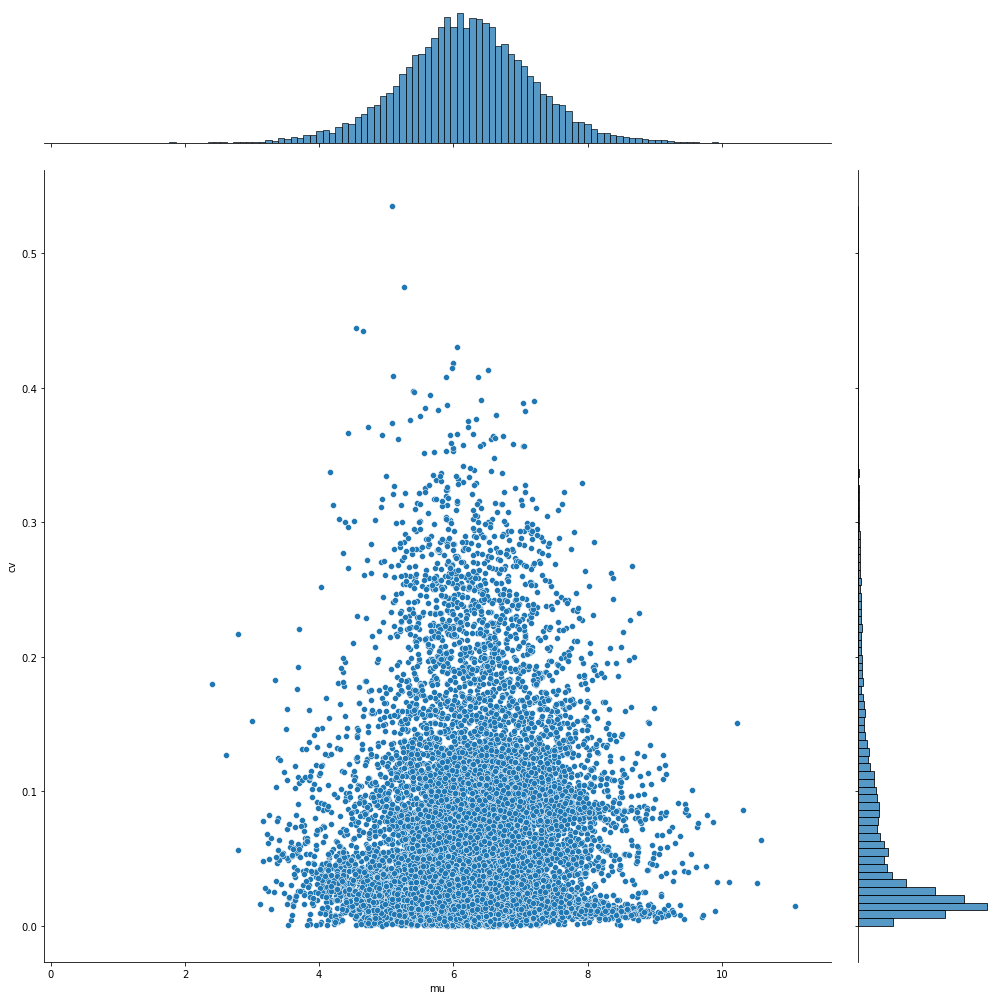

In [518]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="cv", height = 14)

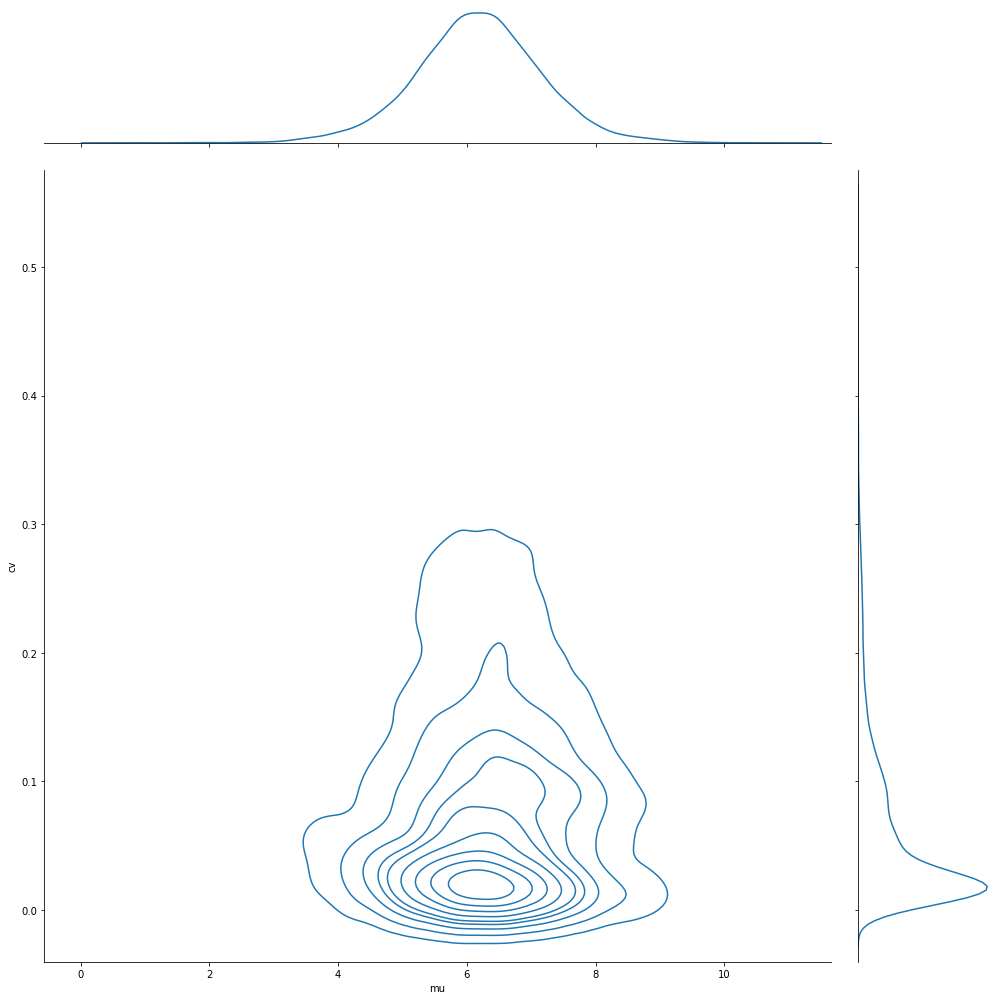

In [519]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="cv", kind="kde", height = 14)

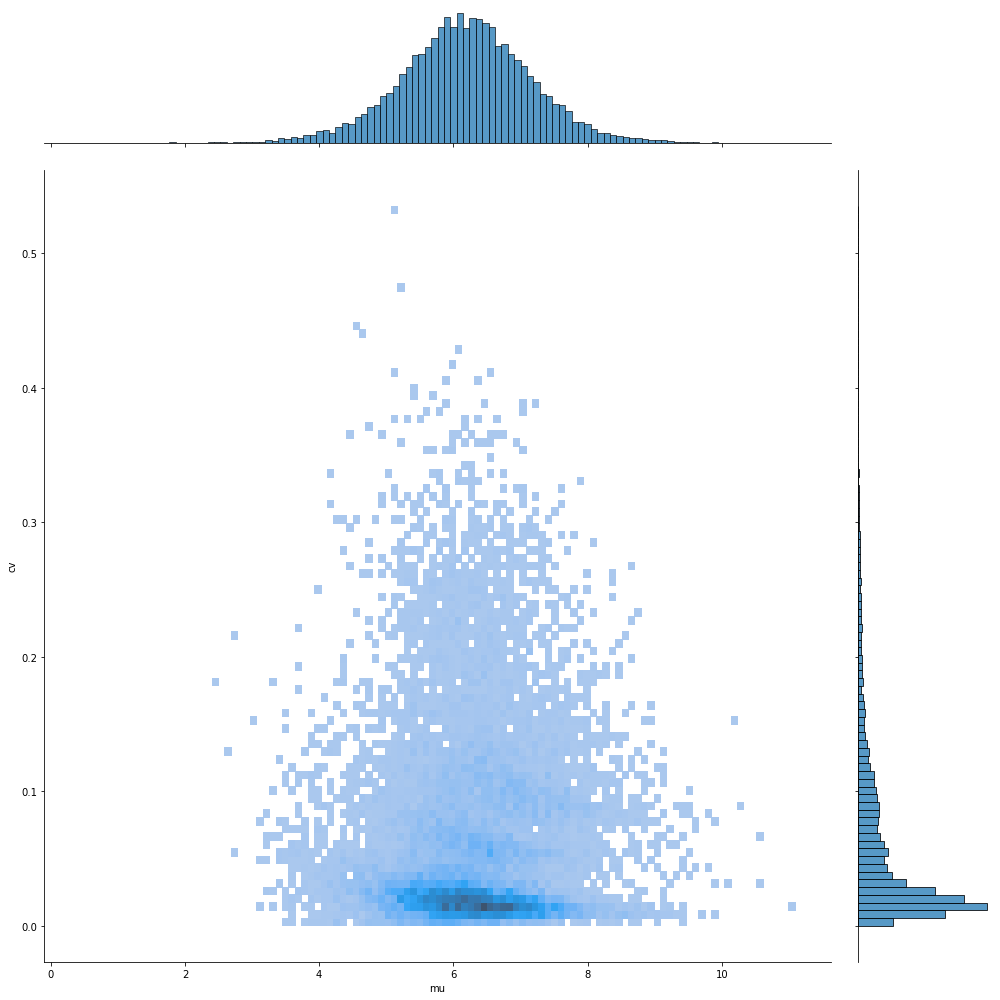

In [520]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="cv", kind="hist", height = 14)

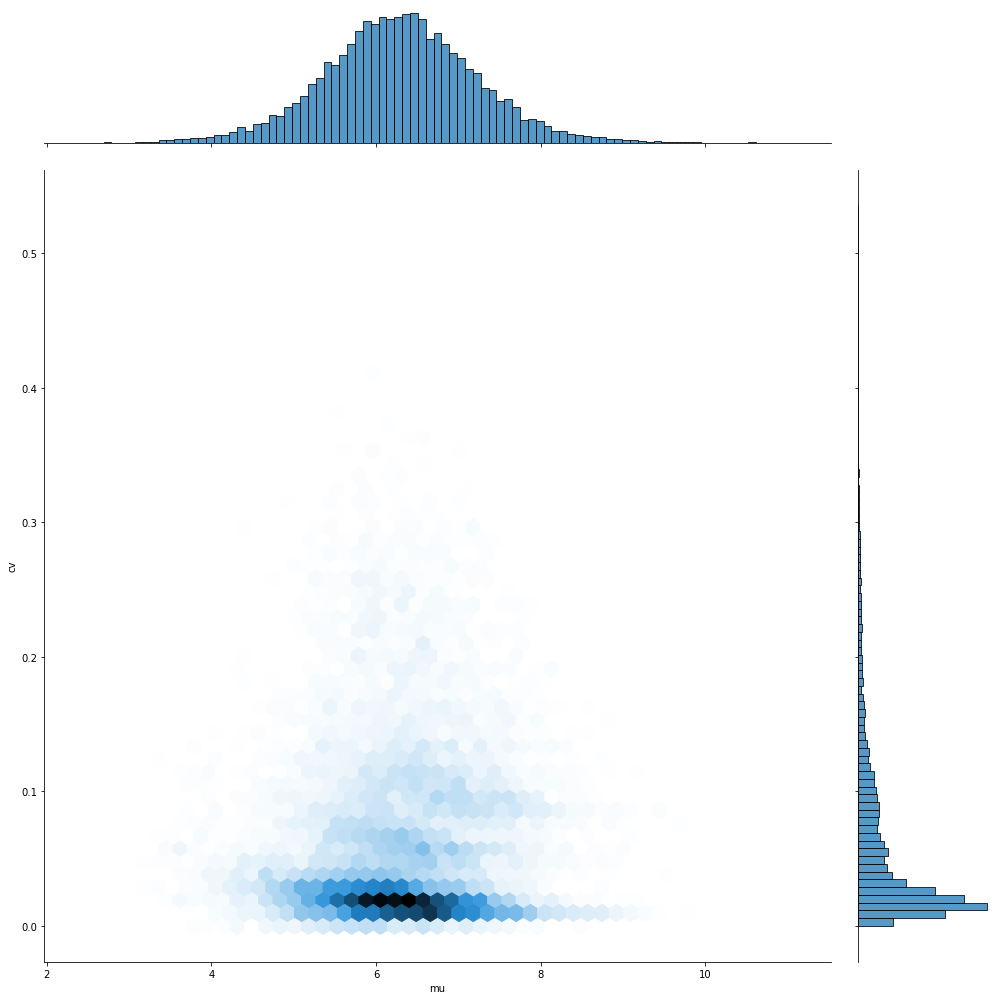

In [521]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="cv", kind="hex", height = 14)

In [523]:
# Unfiltered jointplots

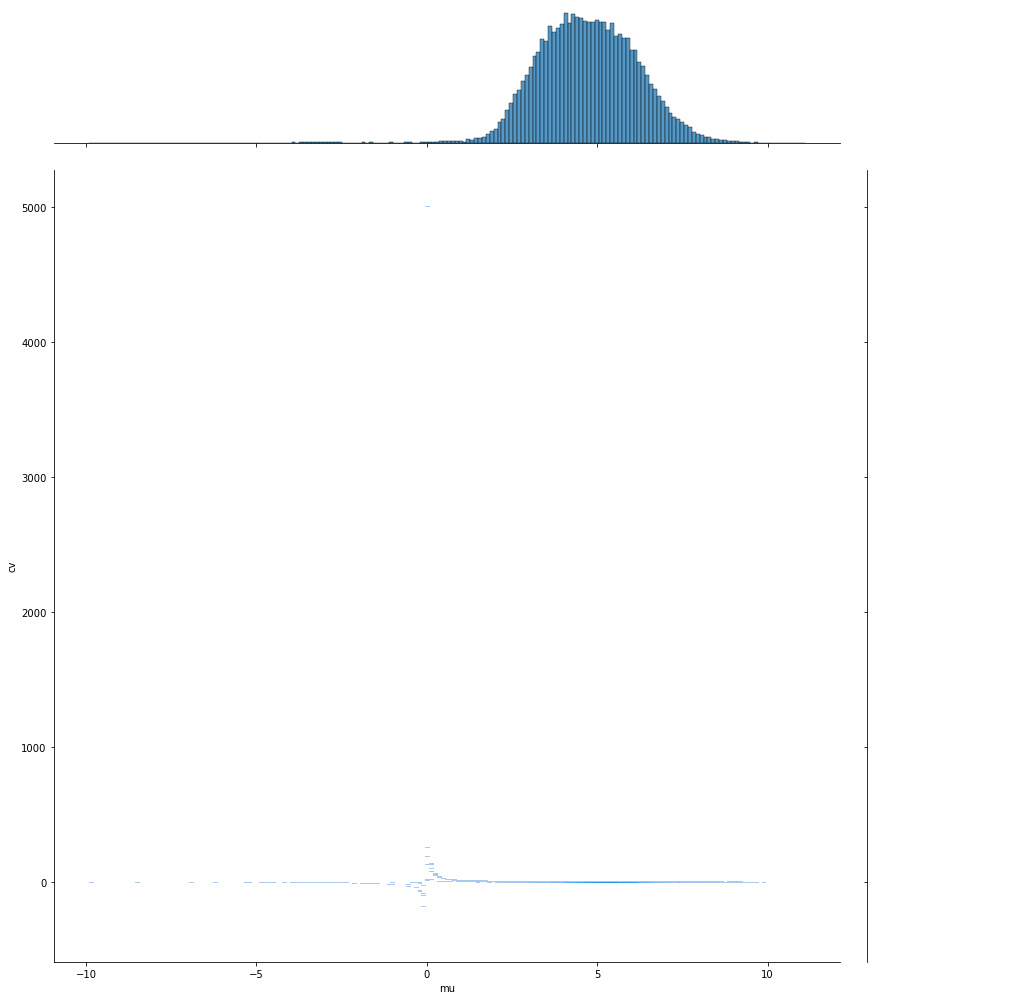

In [528]:
sns.jointplot(data=osw_mu_std, x="mu", y="cv", kind="hist", height = 14)

In [529]:
# makes no sense to try to do the scatter plot on unfiltered data...

## Distplot

In [540]:
diann_no_inf = diann.replace([np.inf, -np.inf], np.nan)

In [550]:
osw["log_intensity"] = np.log(osw.intensity)

In [576]:
osw.log_intensity

0          6.144961
1          5.561704
2          6.122240
3          5.389853
4          5.126044
             ...   
5463653    2.987638
5463654    4.530708
5463655    3.164744
5463656    1.580798
5463657    3.090054
Name: log_intensity, Length: 2788731, dtype: float64

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-2.0, 10.0)

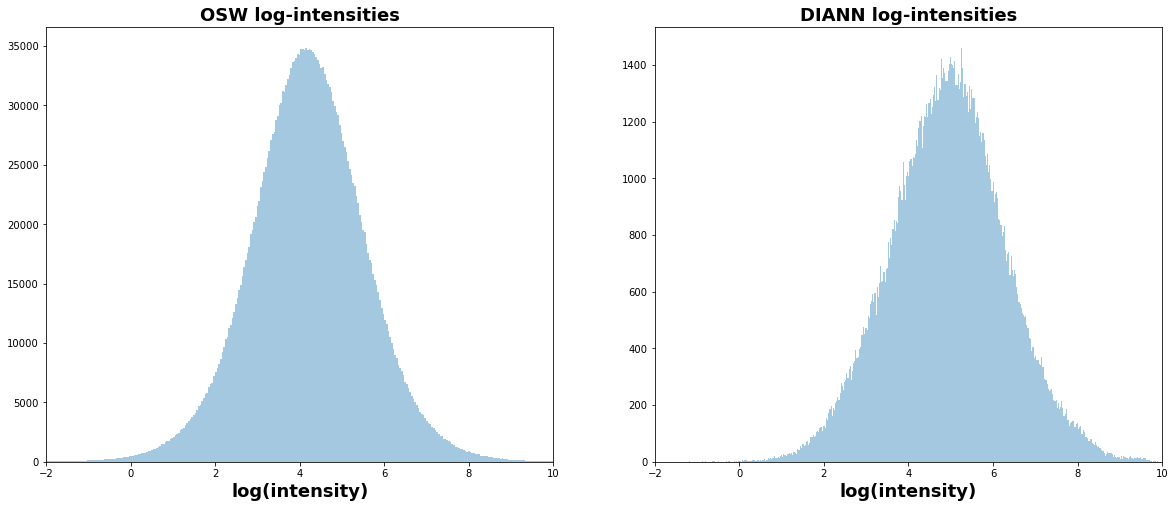

In [560]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.distplot(osw[osw.log_intensity > -10].log_intensity, kde = False, bins = 500, ax = axs[0])
axs[0].set_title("OSW log-intensities", fontsize=18, fontweight='bold')
axs[0].set_xlabel('log(intensity)', fontsize=18, fontweight='bold')
axs[0].set_xlim(-2, 10)
#axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')
sns.distplot(np.log(diann_no_inf.intensity).replace([np.inf, -np.inf], np.nan), bins = 500, kde = False, ax = axs[1])
axs[1].set_title("DIANN log-intensities", fontsize=18, fontweight='bold')
axs[1].set_xlabel('log(intensity)', fontsize=18, fontweight='bold')
axs[1].set_xlim(-2, 10)
#axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')

In [587]:
specie_mapper = lambda x : x.split("_")[-1]
osw["specie"] = osw.proteins.map(specie_mapper)
diann["specie"] = osw.proteins.map(specie_mapper)
diann["log_intensity"] = np.log(diann.intensity)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


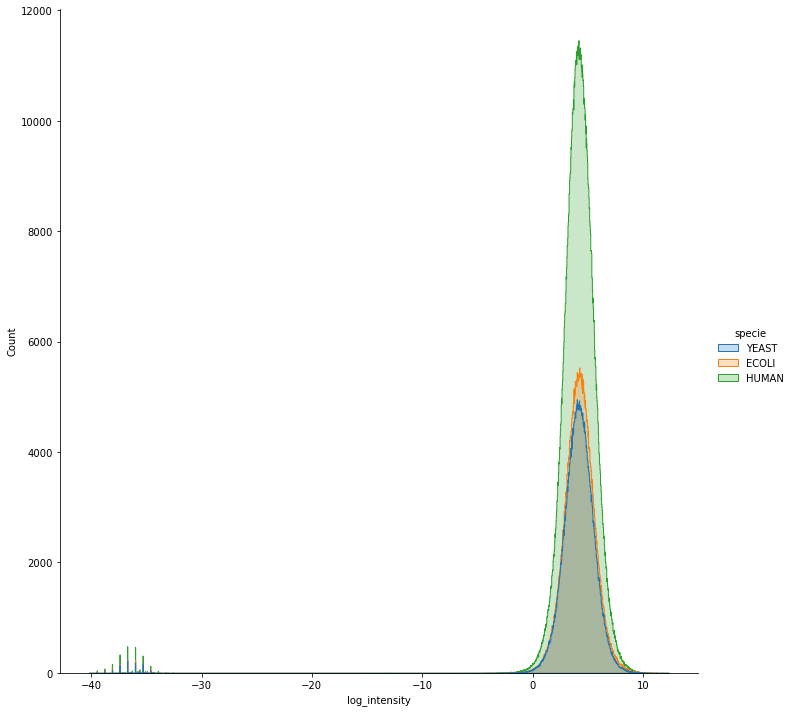

In [584]:
sns.displot(osw, x="log_intensity", hue="specie", element="step", height=10)


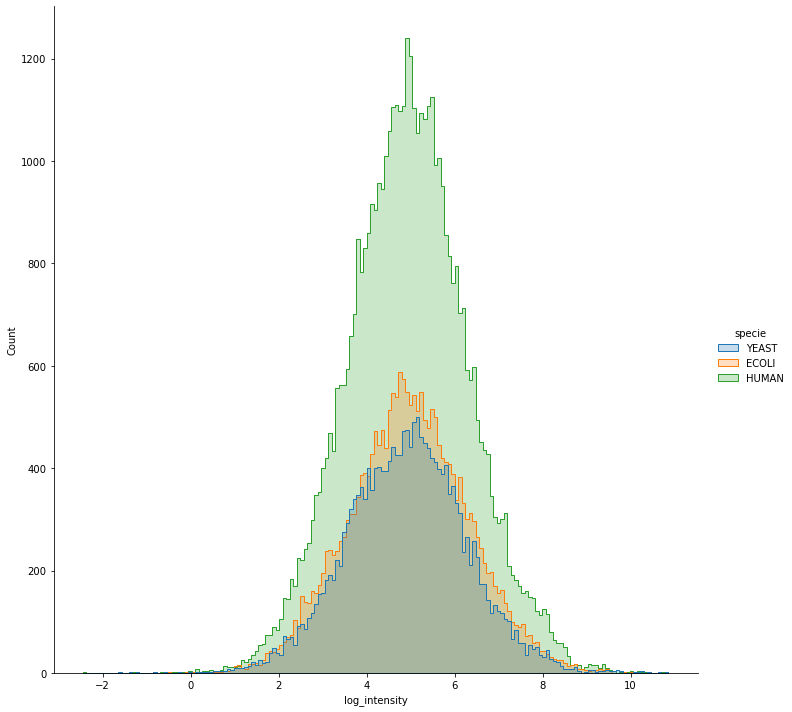

In [590]:
sns.displot(diann.replace([-np.inf, np.inf], np.nan), x="log_intensity", hue="specie", element="step", height=10)
